In [2]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.9 MB 23.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.9 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 26.6 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Configuración de estilos base
plt.style.use('default')
sns.set_palette("husl")

print("Entorno de visualización configurado correctamente")

Entorno de visualización configurado correctamente


In [2]:
# =========================
# PASO 2: PREPARACIÓN DE DATOS
# =========================

# Generar datos de ventas
np.random.seed(42)
n_registros = 1000

ventas_data = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_registros, freq='D'),
    'ventas': np.random.normal(1500, 300, n_registros).clip(min=0),
    'margen': np.random.normal(0.25, 0.05, n_registros).clip(0.1, 0.4),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n_registros),
    'categoria': np.random.choice(['Electrónicos', 'Ropa', 'Hogar', 'Deportes'], n_registros),
    'cliente_tipo': np.random.choice(
        ['Regular', 'VIP', 'Nuevo'],
        n_registros,
        p=[0.7, 0.2, 0.1]
    )
})

# Métricas derivadas
ventas_data['beneficio'] = ventas_data['ventas'] * ventas_data['margen']
ventas_data['mes'] = ventas_data['fecha'].dt.to_period('M')

# Verificación
print("Datos preparados para visualización:")
display(ventas_data.head())

print(f"Total registros: {len(ventas_data)}")
print(f"Rango de fechas: {ventas_data['fecha'].min().date()} → {ventas_data['fecha'].max().date()}")

Datos preparados para visualización:


,fecha,ventas,margen,region,categoria,cliente_tipo,beneficio,mes
0,2024-01-01,1649.014246,0.319968,Sur,Deportes,Regular,527.631414,2024-01
1,2024-01-02,1458.520710,0.296232,Este,Hogar,Regular,432.060046,2024-01
2,2024-01-03,1694.306561,0.252982,Sur,Hogar,VIP,428.628247,2024-01
3,2024-01-04,1956.908957,0.217653,Este,Hogar,Regular,425.927420,2024-01
4,2024-01-05,1429.753988,0.284911,Este,Ropa,Regular,407.352875,2024-01


Total registros: 1000
Rango de fechas: 2024-01-01 → 2026-09-26


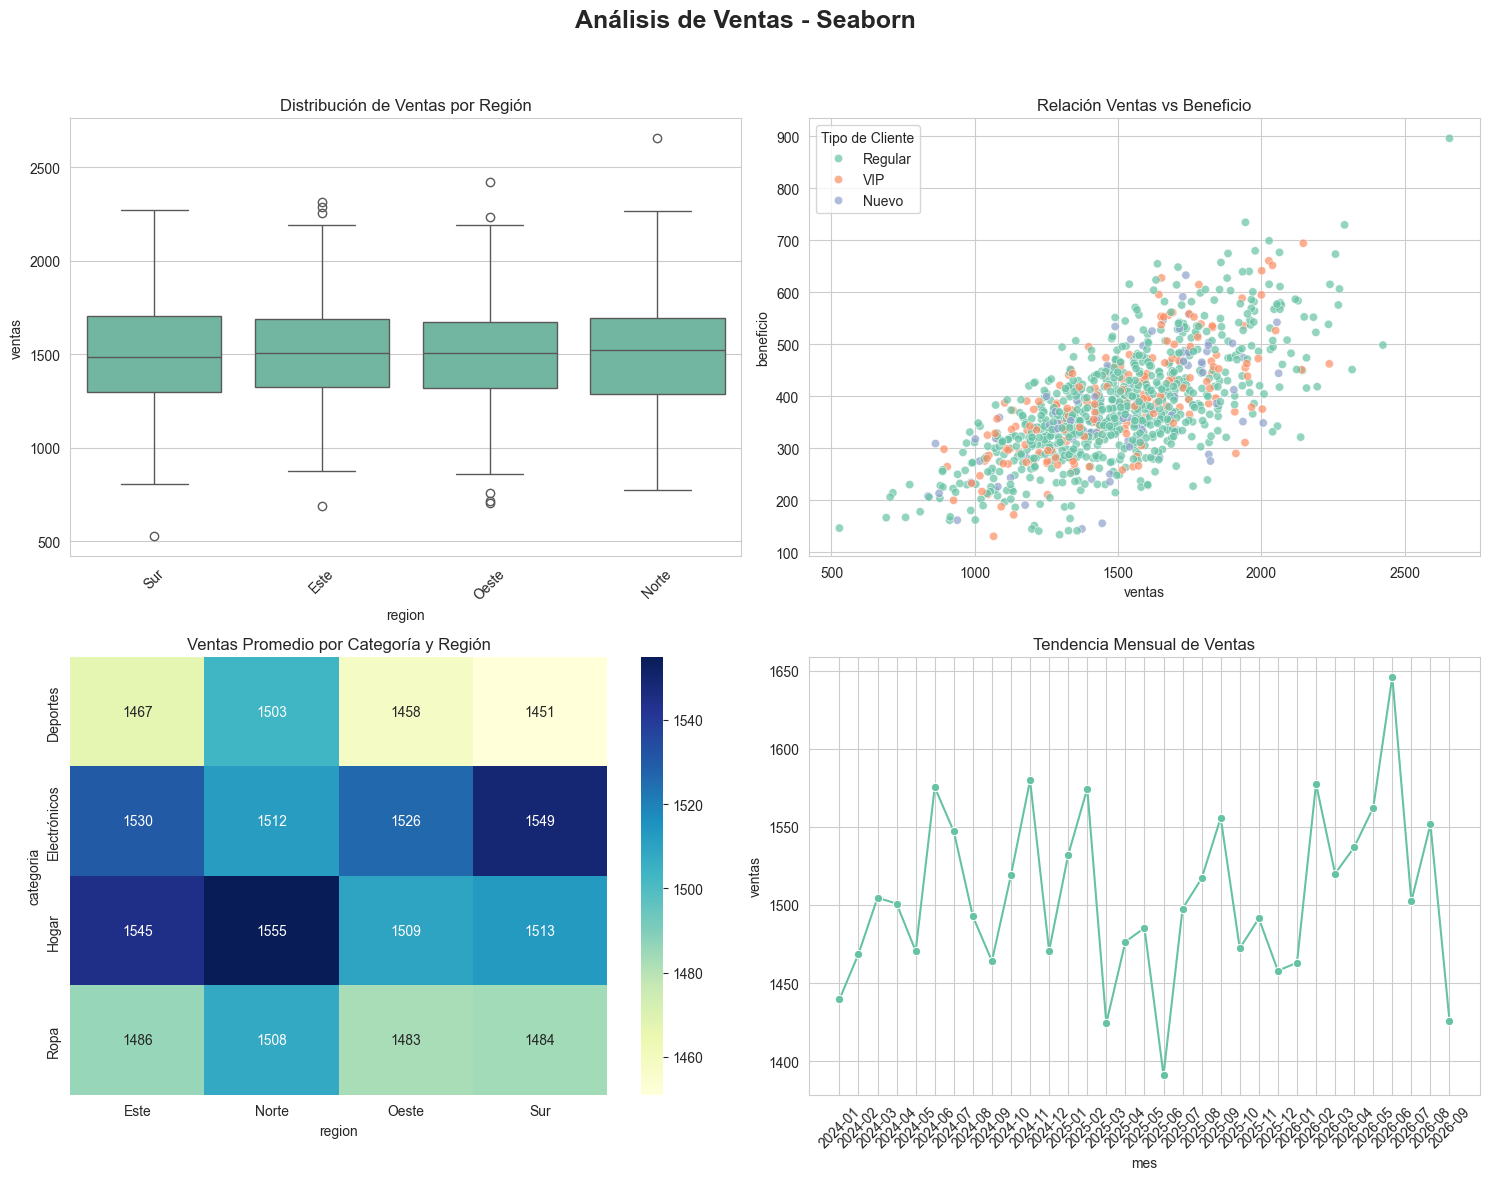

✅ Visualización con Seaborn completada y guardada como evidencia


In [4]:
# =========================
# PASO 3: VISUALIZACIÓN CON SEABORN (CON EVIDENCIA)
# =========================

# Configuración de estilo Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Ventas - Seaborn', fontsize=18, fontweight='bold')

# 1. Distribución de ventas por región
sns.boxplot(
    data=ventas_data,
    x='region',
    y='ventas',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Distribución de Ventas por Región')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Relación ventas vs beneficio
sns.scatterplot(
    data=ventas_data,
    x='ventas',
    y='beneficio',
    hue='cliente_tipo',
    alpha=0.7,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Relación Ventas vs Beneficio')
axes[0, 1].legend(title='Tipo de Cliente')

# 3. Ventas promedio por categoría y región
pivot_data = ventas_data.pivot_table(
    values='ventas',
    index='categoria',
    columns='region',
    aggfunc='mean'
)

sns.heatmap(
    pivot_data,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Ventas Promedio por Categoría y Región')

# 4. Tendencia mensual de ventas
ventas_mensuales = (
    ventas_data
    .groupby('mes')['ventas']
    .mean()
    .reset_index()
)
ventas_mensuales['mes'] = ventas_mensuales['mes'].astype(str)

sns.lineplot(
    data=ventas_mensuales,
    x='mes',
    y='ventas',
    marker='o',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Tendencia Mensual de Ventas')
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajustes finales
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Guardar evidencia
plt.savefig(
    'analisis_seaborn_comparacion_ventas_dia5.png',
    dpi=300,
    bbox_inches='tight'
)

plt.show()

print("✅ Visualización con Seaborn completada y guardada como evidencia")

In [5]:
# =========================
# PASO 4: DASHBOARD INTERACTIVO CON PLOTLY (CON EVIDENCIA)
# =========================

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Crear dashboard con subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Ventas Totales por Región',
        'Distribución de Ventas por Categoría',
        'Tendencia Temporal de Ventas',
        'Beneficio vs Ventas'
    ),
    specs=[
        [{'type': 'bar'}, {'type': 'pie'}],
        [{'type': 'scatter'}, {'type': 'scatter'}]
    ]
)

# 1. Ventas por región (barra)
ventas_region = (
    ventas_data
    .groupby('region')['ventas']
    .sum()
    .reset_index()
)

fig.add_trace(
    go.Bar(
        x=ventas_region['region'],
        y=ventas_region['ventas'],
        name='Ventas por Región'
    ),
    row=1, col=1
)

# 2. Distribución por categoría (pie)
ventas_categoria = (
    ventas_data
    .groupby('categoria')['ventas']
    .sum()
    .reset_index()
)

fig.add_trace(
    go.Pie(
        labels=ventas_categoria['categoria'],
        values=ventas_categoria['ventas'],
        name='Ventas por Categoría'
    ),
    row=1, col=2
)

# 3. Tendencia temporal
ventas_tiempo = (
    ventas_data
    .groupby('mes')['ventas']
    .mean()
    .reset_index()
)
ventas_tiempo['mes'] = ventas_tiempo['mes'].astype(str)

fig.add_trace(
    go.Scatter(
        x=ventas_tiempo['mes'],
        y=ventas_tiempo['ventas'],
        mode='lines+markers',
        name='Tendencia Mensual'
    ),
    row=2, col=1
)

# 4. Beneficio vs ventas
fig.add_trace(
    go.Scatter(
        x=ventas_data['ventas'],
        y=ventas_data['beneficio'],
        mode='markers',
        name='Beneficio vs Ventas',
        marker=dict(
            color=ventas_data['margen'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title='Margen')
        ),
        text=ventas_data['categoria']
    ),
    row=2, col=2
)

# Layout general
fig.update_layout(
    title='Dashboard Interactivo de Ventas - Plotly',
    height=800,
    template='plotly_white',
    showlegend=True
)

# Guardar evidencia interactiva
fig.write_html(
    'dashboard_plotly_comparacion_ventas_dia5.html'
)

fig.show()

print("✅ Dashboard Plotly generado y guardado como evidencia HTML")

✅ Dashboard Plotly generado y guardado como evidencia HTML


=== ANÁLISIS RÁPIDO CON PANDAS PLOTTING ===

Estadísticas descriptivas:
            ventas    beneficio       margen
count  1000.000000  1000.000000  1000.000000
mean   1505.799617   381.165730     0.253525
std     293.764781   104.937757     0.049823
min     527.619798   130.323987     0.102981
25%    1305.722908   314.235907     0.219688
50%    1507.590184   371.578356     0.253154
75%    1694.383163   442.942453     0.286444
max    2655.819447   896.282859     0.400000


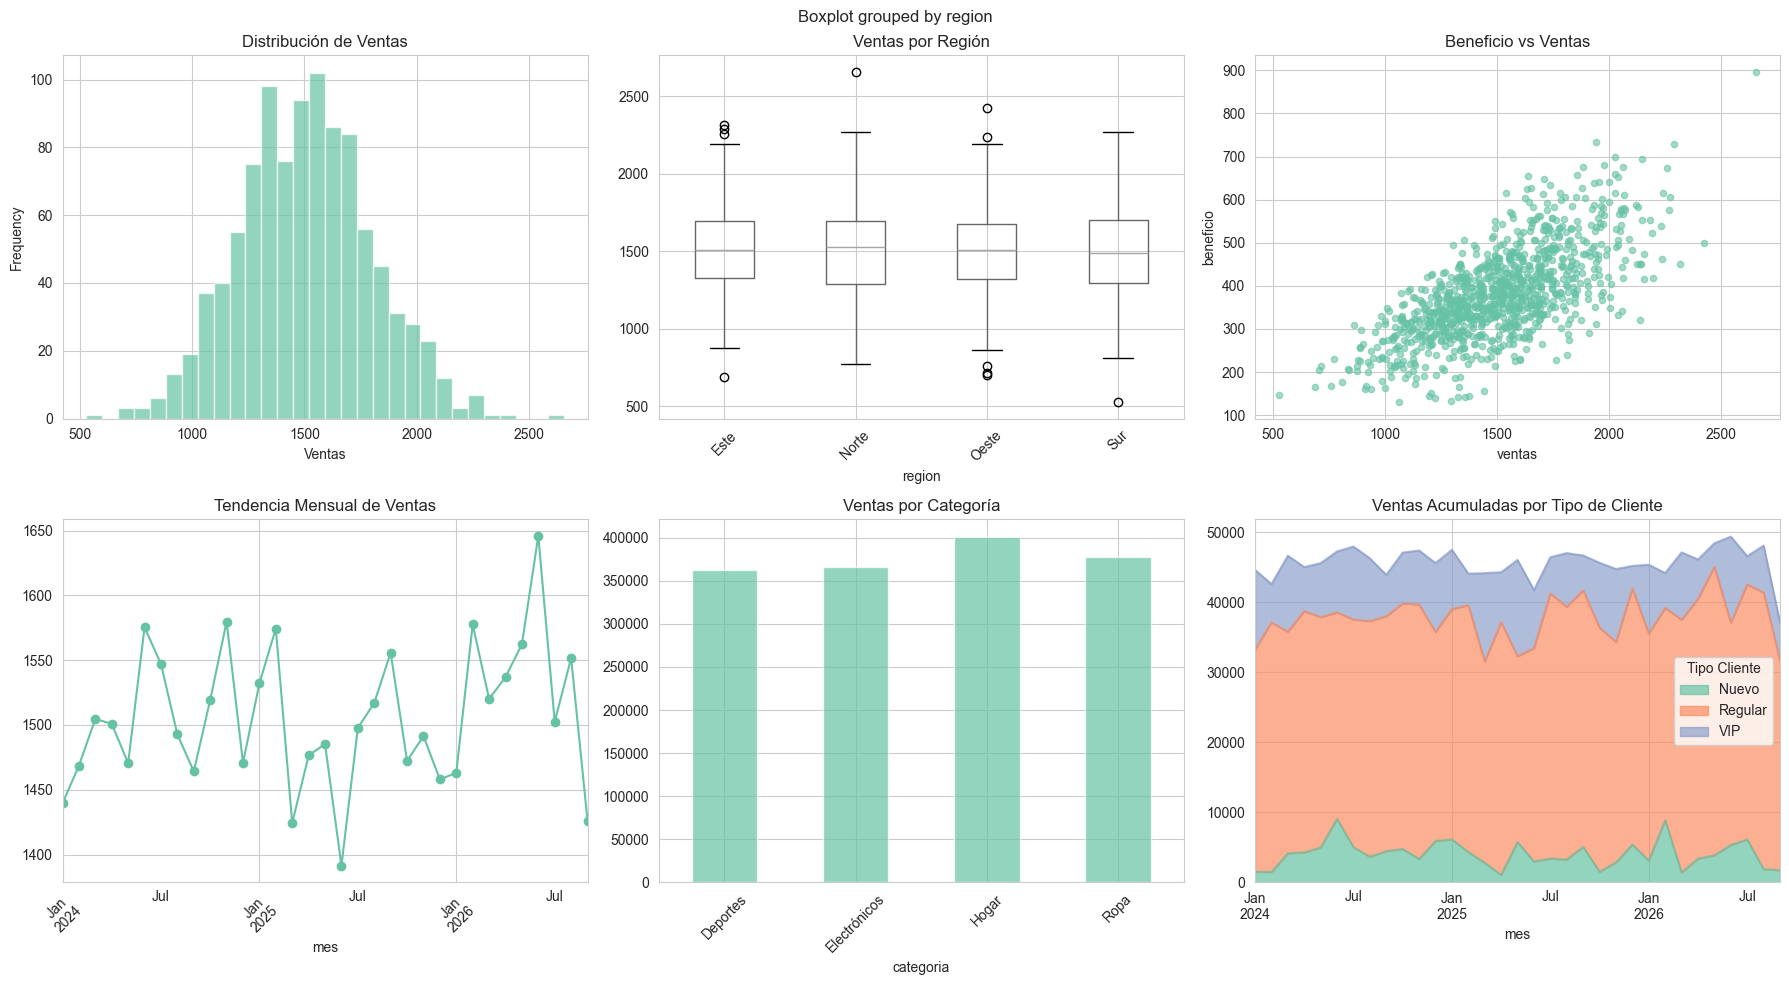

✅ Análisis Pandas plotting completado y evidencia guardada


In [6]:
# =========================
# PASO 5: ANÁLISIS RÁPIDO CON PANDAS PLOTTING (CON EVIDENCIA)
# =========================

import matplotlib.pyplot as plt

print("=== ANÁLISIS RÁPIDO CON PANDAS PLOTTING ===")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(ventas_data[['ventas', 'beneficio', 'margen']].describe())

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    'Análisis Exploratorio Rápido - Pandas Plotting',
    fontsize=16,
    fontweight='bold'
)

# 1. Histograma de ventas
ventas_data['ventas'].plot.hist(
    bins=30,
    ax=axes[0, 0],
    alpha=0.7
)
axes[0, 0].set_title('Distribución de Ventas')
axes[0, 0].set_xlabel('Ventas')

# 2. Boxplot de ventas por región
ventas_data.boxplot(
    column='ventas',
    by='region',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Ventas por Región')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Scatter beneficio vs ventas
ventas_data.plot.scatter(
    x='ventas',
    y='beneficio',
    ax=axes[0, 2],
    alpha=0.6
)
axes[0, 2].set_title('Beneficio vs Ventas')

# 4. Tendencia mensual
ventas_mensual = ventas_data.groupby('mes')['ventas'].mean()
ventas_mensual.plot(
    ax=axes[1, 0],
    marker='o'
)
axes[1, 0].set_title('Tendencia Mensual de Ventas')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Ventas por categoría
ventas_categoria = ventas_data.groupby('categoria')['ventas'].sum()
ventas_categoria.plot.bar(
    ax=axes[1, 1],
    alpha=0.7
)
axes[1, 1].set_title('Ventas por Categoría')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Área acumulada por tipo de cliente
ventas_cliente = (
    ventas_data
    .groupby(['mes', 'cliente_tipo'])['ventas']
    .sum()
    .unstack()
)
ventas_cliente.plot.area(
    ax=axes[1, 2],
    alpha=0.7
)
axes[1, 2].set_title('Ventas Acumuladas por Tipo de Cliente')
axes[1, 2].legend(title='Tipo Cliente')

# Ajustar layout
plt.tight_layout()

# GUARDAR EVIDENCIA
plt.savefig(
    'analisis_pandas_plotting_comparacion_ventas_dia5.png',
    dpi=300,
    bbox_inches='tight'
)

plt.show()

print("✅ Análisis Pandas plotting completado y evidencia guardada")

In [7]:
# ==========================================
# EXPORTACIÓN REPRODUCIBLE A EXCEL - DÍA 5
# ==========================================

import pandas as pd

# =========================
# 1. Dataset base
# =========================
df_base = ventas_data.copy()

# =========================
# 2. Tablas derivadas usadas en el análisis
# =========================

# Ventas totales por región
ventas_region = (
    ventas_data
    .groupby('region')['ventas']
    .sum()
    .reset_index()
    .sort_values('ventas', ascending=False)
)

# Ventas totales por categoría
ventas_categoria = (
    ventas_data
    .groupby('categoria')['ventas']
    .sum()
    .reset_index()
    .sort_values('ventas', ascending=False)
)

# Ventas promedio mensuales
ventas_mensuales = (
    ventas_data
    .groupby('mes')['ventas']
    .mean()
    .reset_index()
)

# Ventas promedio por categoría y región (heatmap)
pivot_categoria_region = (
    ventas_data
    .pivot_table(
        values='ventas',
        index='categoria',
        columns='region',
        aggfunc='mean'
    )
)

# Ventas acumuladas por tipo de cliente y mes
ventas_cliente_mes = (
    ventas_data
    .groupby(['mes', 'cliente_tipo'])['ventas']
    .sum()
    .reset_index()
)

# Métricas descriptivas clave
estadisticas_descriptivas = (
    ventas_data[['ventas', 'beneficio', 'margen']]
    .describe()
)

# =========================
# 3. Exportar a Excel
# =========================

output_file = 'dataset_y_tablas_analisis_ventas_dia5.xlsx'

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df_base.to_excel(writer, sheet_name='dataset_base', index=False)
    ventas_region.to_excel(writer, sheet_name='ventas_por_region', index=False)
    ventas_categoria.to_excel(writer, sheet_name='ventas_por_categoria', index=False)
    ventas_mensuales.to_excel(writer, sheet_name='ventas_mensuales', index=False)
    pivot_categoria_region.to_excel(writer, sheet_name='pivot_categoria_region')
    ventas_cliente_mes.to_excel(writer, sheet_name='ventas_cliente_mes', index=False)
    estadisticas_descriptivas.to_excel(writer, sheet_name='estadisticas_descriptivas')

print("✅ Archivo Excel generado correctamente")
print(f"📁 Archivo creado: {output_file}")
print("🔁 Análisis 100% reproducible desde código")

✅ Archivo Excel generado correctamente
📁 Archivo creado: dataset_y_tablas_analisis_ventas_dia5.xlsx
🔁 Análisis 100% reproducible desde código
